# Exploring categorical variables

## Comparing numerical data across groups

## Setup

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", color_codes=True)

# Custom colors
blue = "#3F83F4"
blue_dark = "#062089"
blue_light = "#8DC0F6"
blue_lighter = "#BBE4FA"
grey = "#9C9C9C"
grey_dark = "#777777"
grey_light = "#B2B2B2"
orange = "#EF8733"
my_colors = [blue, orange]

## Import data

In [2]:
ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "duke-forest.csv"

df = pd.read_csv(ROOT + DATA)
df.head()

,address,price,bed,bath,area,type,year_built,heating,cooling,parking,lot,hoa,url
0,"1 Learned Pl, Durham, NC 27705",1520000,3,4.0,6040,Single Family,1972,"Other, Gas",central,0 spaces,0.97,NaN,https://www.zillow.com/homedetails/1-Learned-P...
1,"1616 Pinecrest Rd, Durham, NC 27705",1030000,5,4.0,4475,Single Family,1969,"Forced air, Gas",central,"Carport, Covered",1.38,NaN,https://www.zillow.com/homedetails/1616-Pinecr...
2,"2418 Wrightwood Ave, Durham, NC 27705",420000,2,3.0,1745,Single Family,1959,"Forced air, Gas",central,"Garage - Attached, Covered",0.51,NaN,https://www.zillow.com/homedetails/2418-Wright...
3,"2527 Sevier St, Durham, NC 27705",680000,4,3.0,2091,Single Family,1961,"Heat pump, Other, Electric, Gas",central,"Carport, Covered",0.84,NaN,https://www.zillow.com/homedetails/2527-Sevier...
4,"2218 Myers St, Durham, NC 27707",428500,4,3.0,1772,Single Family,2020,"Forced air, Gas",central,0 spaces,0.16,NaN,https://www.zillow.com/homedetails/2218-Myers-...


In [3]:
df.tail()

,address,price,bed,bath,area,type,year_built,heating,cooling,parking,lot,hoa,url
93,"2507 Sevier St, Durham, NC 27705",541000,4,4.0,2740,Single Family,1960,"Forced air, Heat pump, Gas",central,"Carport, Covered",0.51,NaN,https://www.zillow.com/homedetails/2507-Sevier...
94,"1207 Woodburn Rd, Durham, NC 27705",473000,3,3.0,2171,Single Family,1955,"Forced air, Electric, Gas",other,0 spaces,0.61,NaN,https://www.zillow.com/homedetails/1207-Woodbu...
95,"3008 Montgomery St, Durham, NC 27705",490000,4,4.0,2972,Single Family,1984,"Forced air, Electric, Gas",central,"Garage - Attached, Off-street, Covered",0.65,NaN,https://www.zillow.com/homedetails/3008-Montgo...
96,"1614 Pinecrest Rd, Durham, NC 27705",815000,4,4.0,3904,Single Family,1970,"Forced air, Gas",other,"Garage - Attached, Garage - Detached, Covered",1.47,NaN,https://www.zillow.com/homedetails/1614-Pinecr...
97,"2708 Circle Dr, Durham, NC 27705",674500,4,4.0,3766,Single Family,1955,"Forced air, Electric, Gas",other,0 spaces,0.73,NaN,https://www.zillow.com/homedetails/2708-Circle...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     98 non-null     object 
 1   price       98 non-null     int64  
 2   bed         98 non-null     int64  
 3   bath        98 non-null     float64
 4   area        98 non-null     int64  
 5   type        98 non-null     object 
 6   year_built  98 non-null     int64  
 7   heating     98 non-null     object 
 8   cooling     98 non-null     object 
 9   parking     98 non-null     object 
 10  lot         97 non-null     float64
 11  hoa         1 non-null      object 
 12  url         98 non-null     object 
dtypes: float64(2), int64(4), object(7)
memory usage: 10.1+ KB


In [5]:
# Drop irrelevant features
df = df.drop(['url', 'address'], axis=1)

In [6]:
# Convert data types
df['type'] = df['type'].astype("category")
df['heating'] = df['heating'].astype("category")
df['cooling'] = df['cooling'].astype("category")
df['parking'] = df['parking'].astype("category")

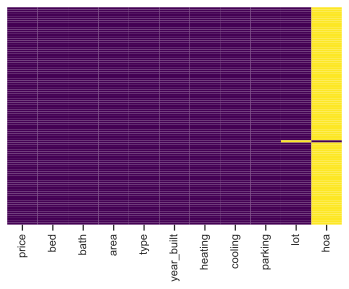

In [7]:
# show missing values (missing values - if present - will be displayed in yellow )
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [8]:
print(df.isnull().sum())

price          0
bed            0
bath           0
area           0
type           0
year_built     0
heating        0
cooling        0
parking        0
lot            1
hoa           97
dtype: int64


In [9]:
# drop column with too many missing values
df = df.drop(['hoa'], axis=1)
# drop remaining row with missing value
df = df.dropna()

In [10]:
print(df.isnull().sum())

price         0
bed           0
bath          0
area          0
type          0
year_built    0
heating       0
cooling       0
parking       0
lot           0
dtype: int64


In [11]:
# summary statistics for all categorical columns
df.describe(include=['category']).transpose()

,count,unique,top,freq
type,97,1,Single Family,97
heating,97,19,"Forced air, Gas",34
cooling,97,2,other,52
parking,97,19,0 spaces,42


Variable `type` has zero veriation (only single family) and therefore can be exluded from the analysis and the model. We will also exclude `heating`and `parking` to keep this example as simple as possible.

In [12]:
df = df.drop(['type', 'heating', 'parking'], axis=1)
df

,price,bed,bath,area,year_built,cooling,lot
0,1520000,3,4.0,6040,1972,central,0.97
1,1030000,5,4.0,4475,1969,central,1.38
2,420000,2,3.0,1745,1959,central,0.51
3,680000,4,3.0,2091,1961,central,0.84
4,428500,4,3.0,1772,2020,central,0.16
...,...,...,...,...,...,...,...
93,541000,4,4.0,2740,1960,central,0.51
94,473000,3,3.0,2171,1955,other,0.61
95,490000,4,4.0,2972,1984,central,0.65
96,815000,4,4.0,3904,1970,other,1.47


In [13]:
# Convert relevant categorical variables to numeric
df = pd.get_dummies(df, columns=['cooling'], prefix='cooling', prefix_sep='_')
df.tail()

,price,bed,bath,area,year_built,lot,cooling_central,cooling_other
93,541000,4,4.0,2740,1960,0.51,1,0
94,473000,3,3.0,2171,1955,0.61,0,1
95,490000,4,4.0,2972,1984,0.65,1,0
96,815000,4,4.0,3904,1970,1.47,0,1
97,674500,4,4.0,3766,1955,0.73,0,1


## Data splitting

In [14]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_dataset

,price,bed,bath,area,year_built,lot,cooling_central,cooling_other
26,385000,3,2.0,1831,1951,0.29,1,0
85,485000,4,3.0,2609,1962,0.52,0,1
2,420000,2,3.0,1745,1959,0.51,1,0
55,150000,3,1.0,1734,1945,0.16,0,1
69,105000,2,1.0,1094,1940,0.26,0,1
...,...,...,...,...,...,...,...,...
96,815000,4,4.0,3904,1970,1.47,0,1
70,520000,4,3.0,2637,1968,0.65,0,1
20,270000,3,3.0,1416,1990,0.36,0,1
92,590000,5,3.0,3323,1980,0.43,0,1


## Exploratory data analysis

In [15]:
# summary statistics for all numerical columns
round(train_dataset.describe(),2).transpose()

,count,mean,std,min,25%,50%,75%,max
price,78.0,560762.18,243254.08,95000.00,421250.00,537500.00,650000.00,1520000.00
bed,78.0,3.81,0.74,2.00,3.00,4.00,4.00,6.00
bath,78.0,3.10,0.92,1.00,2.50,3.00,4.00,5.00
area,78.0,2831.40,986.38,1094.00,2095.25,2745.00,3261.75,6178.00
year_built,78.0,1965.82,16.80,1923.00,1956.25,1961.50,1971.50,2020.00
lot,78.0,0.59,0.23,0.15,0.45,0.56,0.69,1.47
cooling_central,78.0,0.50,0.50,0.00,0.00,0.50,1.00,1.00
cooling_other,78.0,0.50,0.50,0.00,0.00,0.50,1.00,1.00


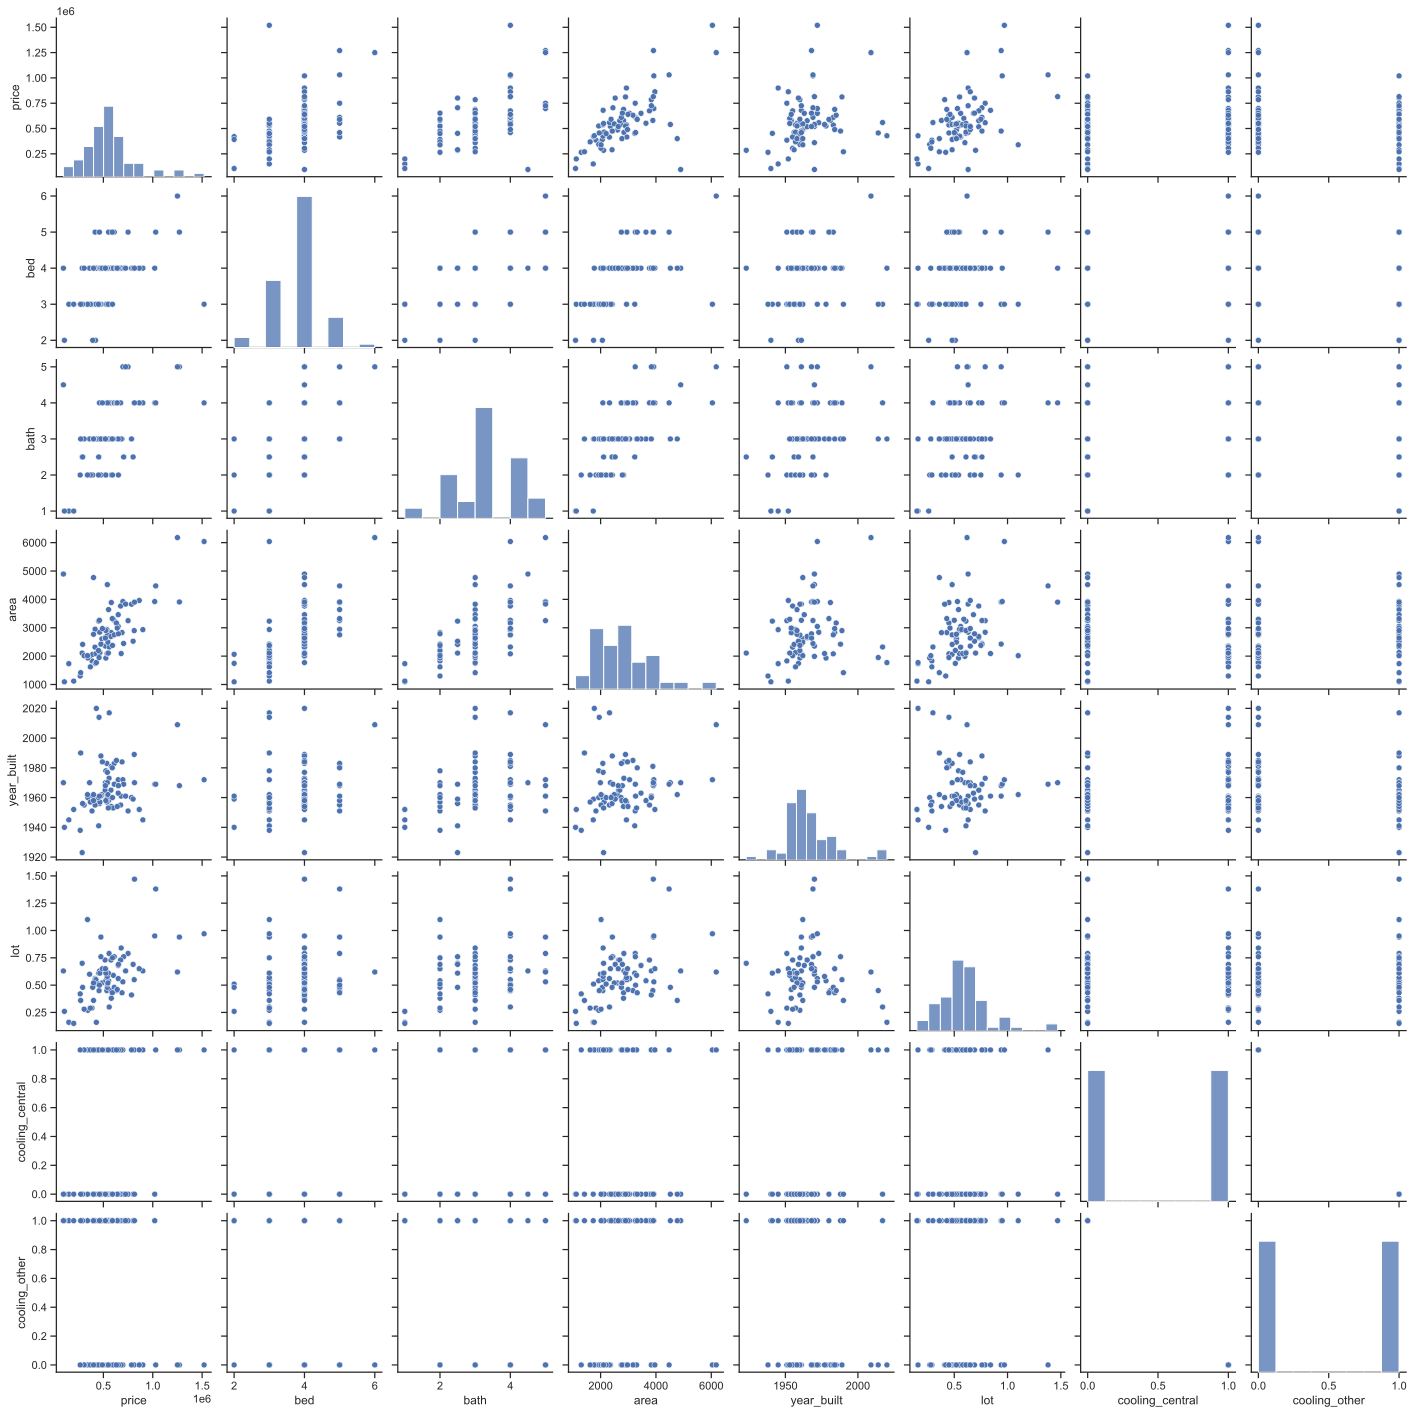

In [16]:
sns.pairplot(train_dataset);

## Correlation analysis

In [17]:
# Create correlation matrix for numerical variables
corr_matrix = train_dataset.corr()
corr_matrix

,price,bed,bath,area,year_built,lot,cooling_central,cooling_other
price,1.000000,0.446668,0.593686,0.680012,0.248102,0.537264,0.217669,-0.217669
bed,0.446668,1.000000,0.599660,0.560258,0.216696,0.248166,0.052342,-0.052342
bath,0.593686,0.599660,1.000000,0.659879,0.351917,0.335490,0.167656,-0.167656
area,0.680012,0.560258,0.659879,1.000000,0.165495,0.412836,-0.018432,0.018432
year_built,0.248102,0.216696,0.351917,0.165495,1.000000,-0.047352,0.221208,-0.221208
lot,0.537264,0.248166,0.335490,0.412836,-0.047352,1.000000,-0.077233,0.077233
cooling_central,0.217669,0.052342,0.167656,-0.018432,0.221208,-0.077233,1.000000,-1.000000
cooling_other,-0.217669,-0.052342,-0.167656,0.018432,-0.221208,0.077233,-1.000000,1.000000


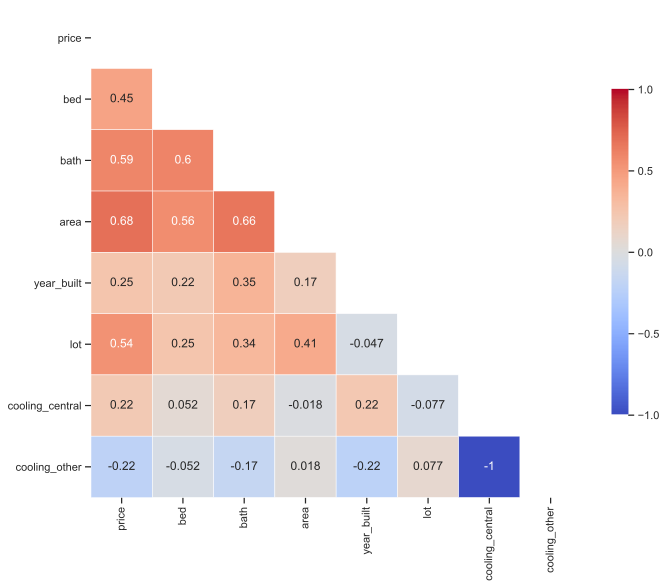

In [18]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(11, 15))


heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True});

## Modeling

In [19]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.1


## Split features from labels

In [20]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

train_features

,bed,bath,area,year_built,lot,cooling_central,cooling_other
26,3,2.0,1831,1951,0.29,1,0
85,4,3.0,2609,1962,0.52,0,1
2,2,3.0,1745,1959,0.51,1,0
55,3,1.0,1734,1945,0.16,0,1
69,2,1.0,1094,1940,0.26,0,1
...,...,...,...,...,...,...,...
96,4,4.0,3904,1970,1.47,0,1
70,4,3.0,2637,1968,0.65,0,1
20,3,3.0,1416,1990,0.36,0,1
92,5,3.0,3323,1980,0.43,0,1


## Normalization

In the table of statistics it's easy to see how different the ranges of each feature are.

In [21]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
price,560762.179487,243254.081023
bed,3.807692,0.739563
bath,3.102564,0.923569
area,2831.397436,986.375055
year_built,1965.820513,16.799616
lot,0.586795,0.232231
cooling_central,0.500000,0.503236
cooling_other,0.500000,0.503236


It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model might converge without feature normalization, normalization makes training much more stable.

The first step is to create the layer:

In [22]:
normalizer = preprocessing.Normalization(axis=-1)

Then .adapt() it to the data:

In [23]:
normalizer.adapt(np.array(train_features))

This calculates the mean and variance, and stores them in the layer:

In [24]:
print(normalizer.mean.numpy())

[3.8076923e+00 3.1025641e+00 2.8313975e+03 1.9658206e+03 5.8679485e-01
 5.0000000e-01 5.0000000e-01]


When the layer is called it returns the input data, with each feature independently normalized:

In [25]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   3.      2.   1831.   1951.      0.29    1.      0.  ]]

Normalized: [[-1.1  -1.2  -1.02 -0.89 -1.29  1.   -1.  ]]


## Linear regression

Start with a single-variable linear regression, to predict price from area.

Training a model with tf.keras typically starts by defining the model architecture.

In this case use a keras.Sequential model. This model represents a sequence of steps. In this case there are two steps:

- Normalize the input horsepower.
- Apply a linear transformation to produce 1 output using layers.Dense.
  
The number of inputs can either be set by the input_shape argument, or automatically when the model is run for the first time.

First create the are Normalization layer:

In [26]:
area = np.array(train_features['area'])

area_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
area_normalizer.adapt(area)

Build the sequential model:

In [27]:
area_model = tf.keras.Sequential([
    area_normalizer,
    layers.Dense(units=1)
])

area_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


This model will predict price from area.

Run the untrained model on the first 10 area values. The output won't be good, but you'll see that it has the expected shape, (10,1):

In [28]:
area_model.predict(area[:10])

array([[ 1.1492099 ],
       [ 0.2554798 ],
       [ 1.2480026 ],
       [ 1.260639  ],
       [ 1.995841  ],
       [ 0.9642606 ],
       [-0.46249098],
       [-0.48087105],
       [ 0.5484119 ],
       [ 0.46685043]], dtype=float32)

Once the model is built, configure the training procedure using the Model.compile() method. The most important arguments to compile are the loss and the optimizer since these define what will be optimized (mean_absolute_error) and how (using the optimizers.Adam).

In [29]:
area_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Once the training is configured, use Model.fit() to execute the training:

In [30]:
%%time
history = area_model.fit(
    train_features['area'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 4.38 s, sys: 462 ms, total: 4.84 s
Wall time: 4.83 s


Visualize the model's training progress using the stats stored in the history object.

In [31]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,572560.7500,514949.53125,95
96,572560.5625,514949.37500,96
97,572560.3750,514949.15625,97
98,572560.1875,514948.93750,98
99,572560.0000,514948.75000,99


In [32]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [price]')
  plt.legend()
  plt.grid(True)

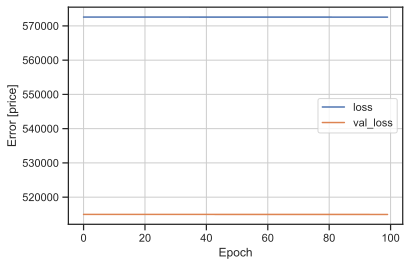

In [33]:
plot_loss(history)

Collect the results on the test set, for later:

In [34]:
test_results = {}

test_results['area_model'] = area_model.evaluate(
    test_features['area'],
    test_labels, verbose=0)

Since this is a single variable regression it's easy to look at the model's predictions as a function of the input:

In [35]:
x = tf.linspace(0.0, 6200, 100)
y = area_model.predict(x)

In [36]:
def plot_area(x, y):
  plt.scatter(train_features['area'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('area')
  plt.ylabel('price')
  plt.legend()

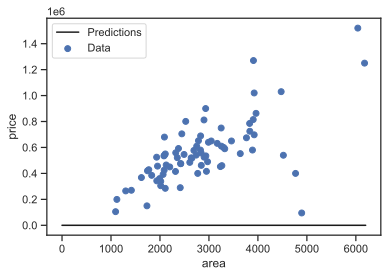

In [37]:
plot_area(x,y)